# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Michael Teguh Carlo Simbolon
- **Email:** carlosimbolon23@gmail.com
- **ID Dicoding:** MS155D5Y0583

## Menentukan Pertanyaan Bisnis

1. Bagaimana mengoptimalkan kapasitas penyewaan sepeda?
2. Bagaimana mitigasi dampak cuaca terhadap penyewaan?
3. Apa tren musiman dan tahunan dalam penyewaan sepeda?
4. Bagaimana pengaruh hari libur terhadap penyewaan?
5. Apa faktor kenyamanan cuaca yang mempengaruhi penyewaan?
6. Apa karakteristik pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [47]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [48]:
# Load datasets
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

# Tampilkan informasi dataset
print("Dataset Harian:")
print(day_df.info())
print("\nSampel data harian:")
print(day_df.head())

Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Sampel data harian:
   instant      dteday  season  yr  mnth  holiday  

### Assessing Data

In [49]:
# Cek missing values
print("Missing Values:")
print(day_df.isnull().sum())

# Cek duplikasi
print("\nJumlah Duplikasi:")
print(day_df.duplicated().sum())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(day_df.describe())

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplikasi:
0

Statistik Deskriptif:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.

### Cleaning Data

In [50]:
# Konversi tanggal dan kategorisasi
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Membuat label kategori yang bermakna
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_labels = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

# Terapkan label
day_df['season'] = day_df['season'].map(season_labels)
hour_df['season'] = hour_df['season'].map(season_labels)
day_df['weathersit'] = day_df['weathersit'].map(weather_labels)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_labels)

## Exploratory Data Analysis (EDA)

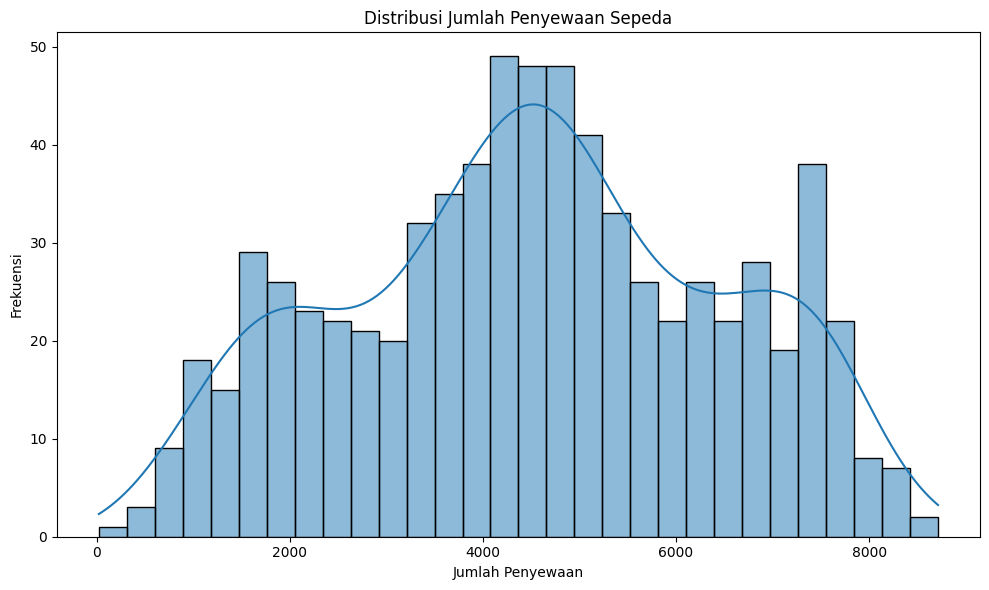

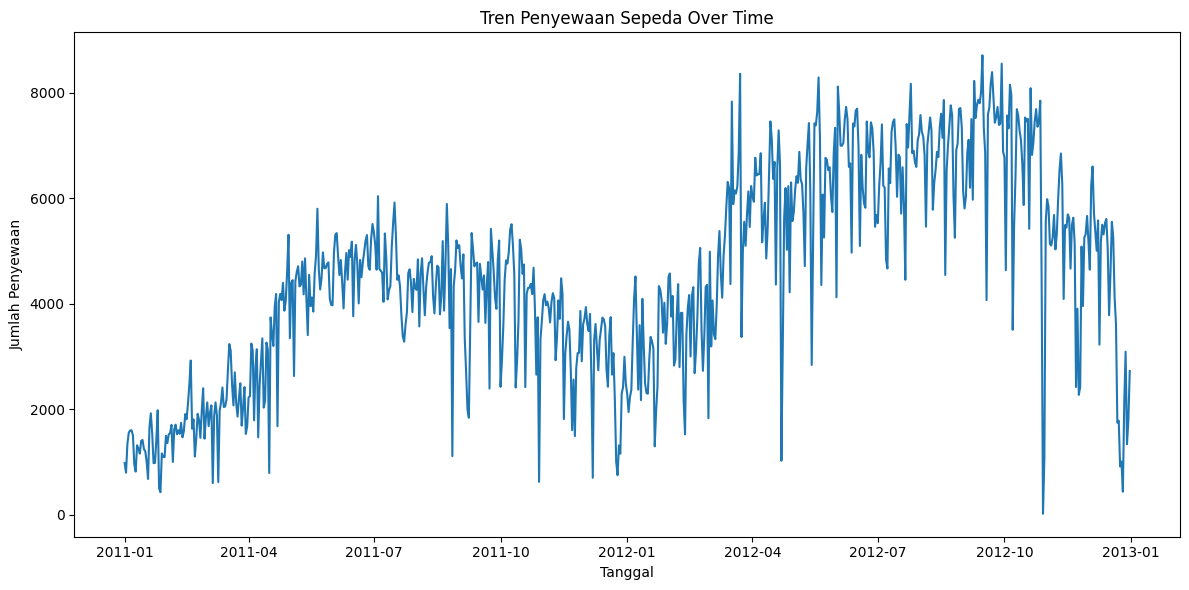

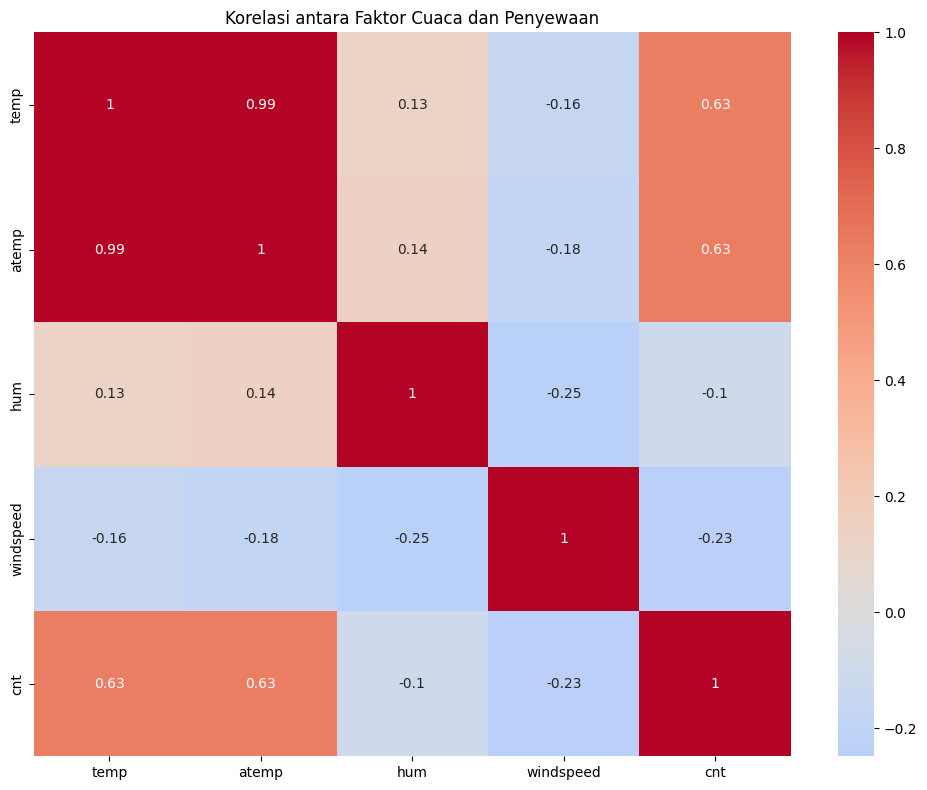

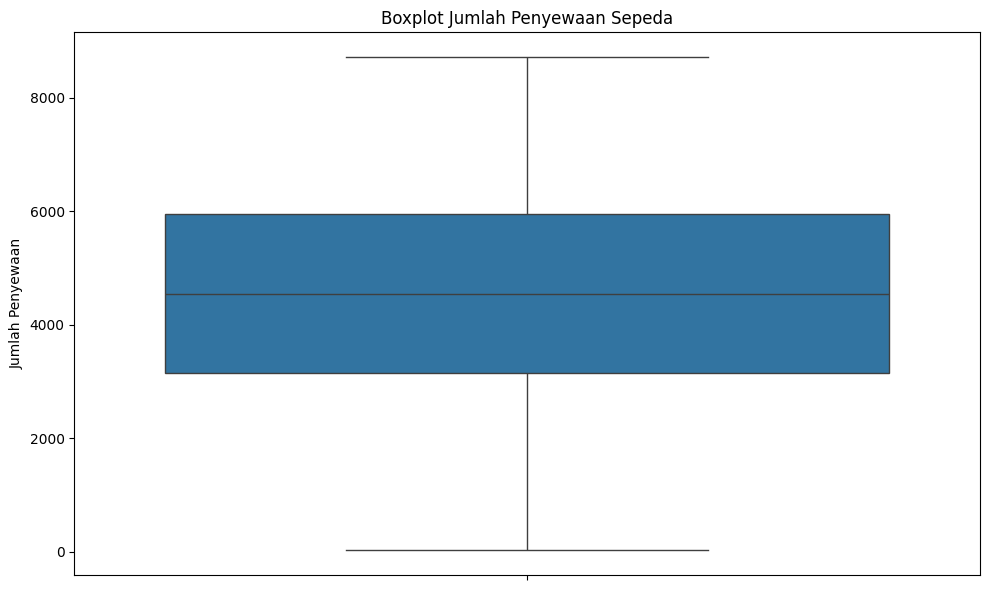

In [51]:
# Distribusi Data
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Tren Data
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt')
plt.title('Tren Penyewaan Sepeda Over Time')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

# Korelasi Data
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Faktor Cuaca dan Penyewaan')
plt.tight_layout()
plt.show()

# Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, y='cnt')
plt.title('Boxplot Jumlah Penyewaan Sepeda')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Q1: Optimasi Kapasitas Penyewaan Sepeda

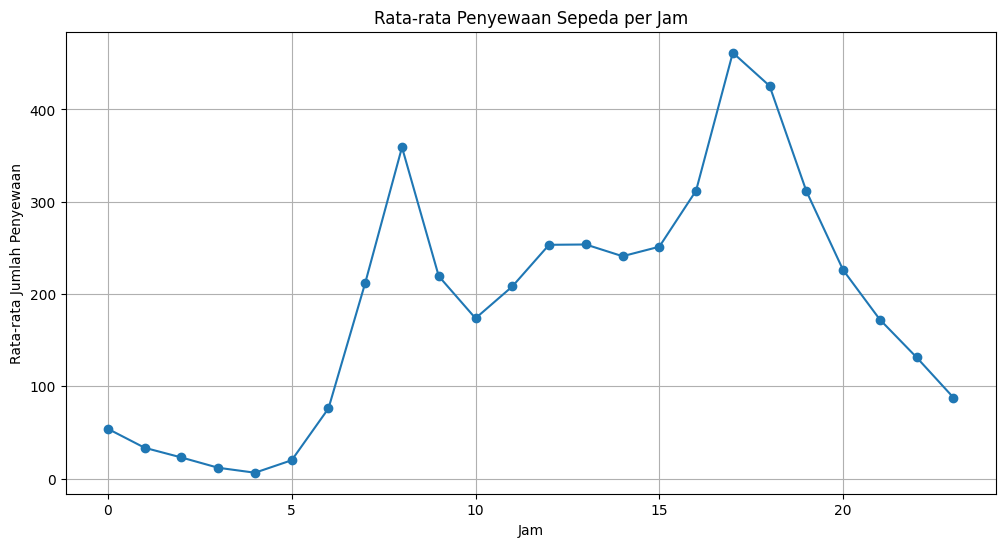

Jam-jam Puncak Penyewaan:
hr
17    461.452055
18    425.510989
8     359.011004
Name: cnt, dtype: float64


In [52]:
# Analisis pola temporal
hourly_usage = hour_df.groupby('hr')['cnt'].mean()
daily_usage = hour_df.groupby('weekday')['cnt'].mean()

# Visualisasi penggunaan per jam
plt.figure(figsize=(12, 6))
hourly_usage.plot(kind='line', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(True)
plt.show()

# Jam-jam puncak
peak_hours = hourly_usage.nlargest(3)
print("Jam-jam Puncak Penyewaan:")
print(peak_hours)

### Q2: Mitigasi Dampak Cuaca

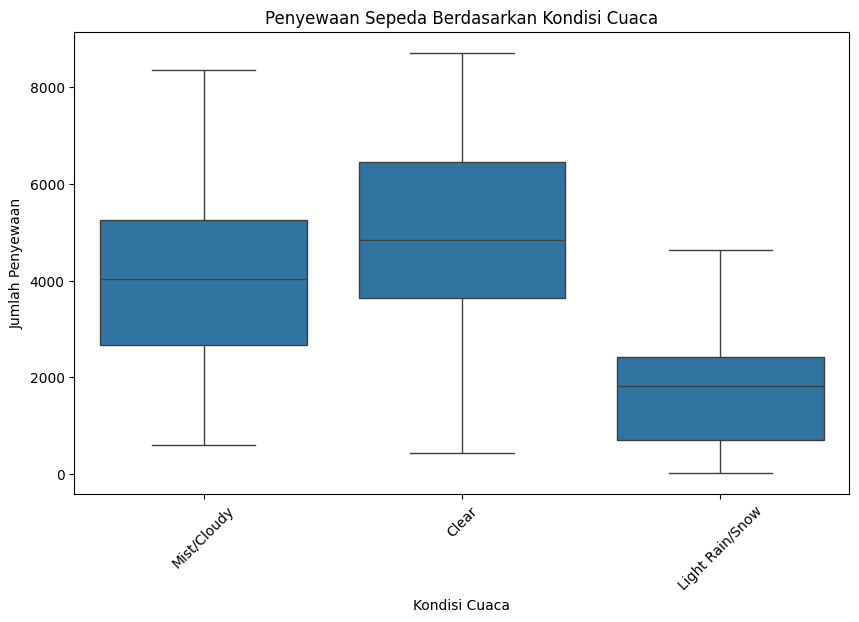

Korelasi Temperatur dengan Penyewaan: 0.63


In [53]:
# Analisis dampak cuaca
weather_usage = day_df.groupby('weathersit')['cnt'].agg(['mean', 'count'])

# Visualisasi pengaruh cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

# Korelasi temperatur dengan penyewaan
temp_correlation = day_df['temp'].corr(day_df['cnt'])
print(f"Korelasi Temperatur dengan Penyewaan: {temp_correlation:.2f}")

### Q3: Tren Musiman dan Tahunan

<Figure size 1200x600 with 0 Axes>

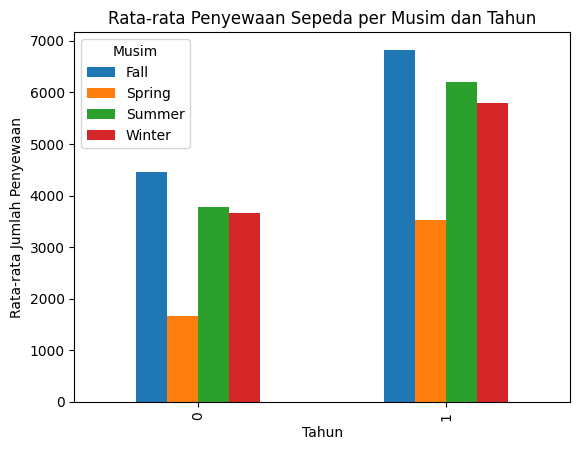

In [54]:
# Analisis tren musiman dan tahunan
seasonal_yearly_rental = day_df.groupby(['yr', 'season'])['cnt'].mean().unstack()

# Visualisasi
plt.figure(figsize=(12, 6))
seasonal_yearly_rental.plot(kind='bar')
plt.title('Rata-rata Penyewaan Sepeda per Musim dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.legend(title='Musim')
plt.show()

### Q4: Dampak Hari Libur

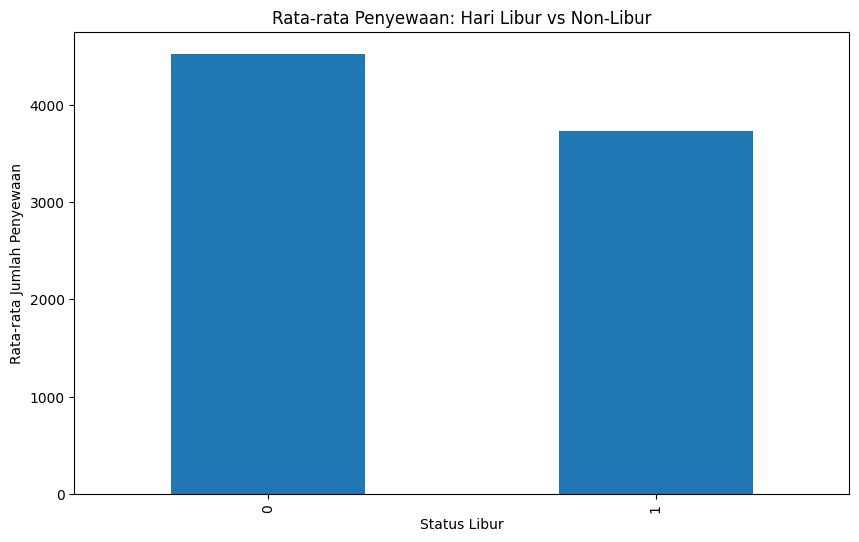

Statistik Penyewaan Berdasarkan Status Libur:
                mean  median  count
holiday                            
0        4527.104225  4558.0    710
1        3735.000000  3351.0     21


In [55]:
# Analisis dampak hari libur
holiday_rental = day_df.groupby('holiday')['cnt'].agg(['mean', 'median', 'count'])

# Visualisasi
plt.figure(figsize=(10, 6))
holiday_rental['mean'].plot(kind='bar')
plt.title('Rata-rata Penyewaan: Hari Libur vs Non-Libur')
plt.xlabel('Status Libur')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

print("Statistik Penyewaan Berdasarkan Status Libur:")
print(holiday_rental)

### Q5: Faktor Kenyamanan Cuaca

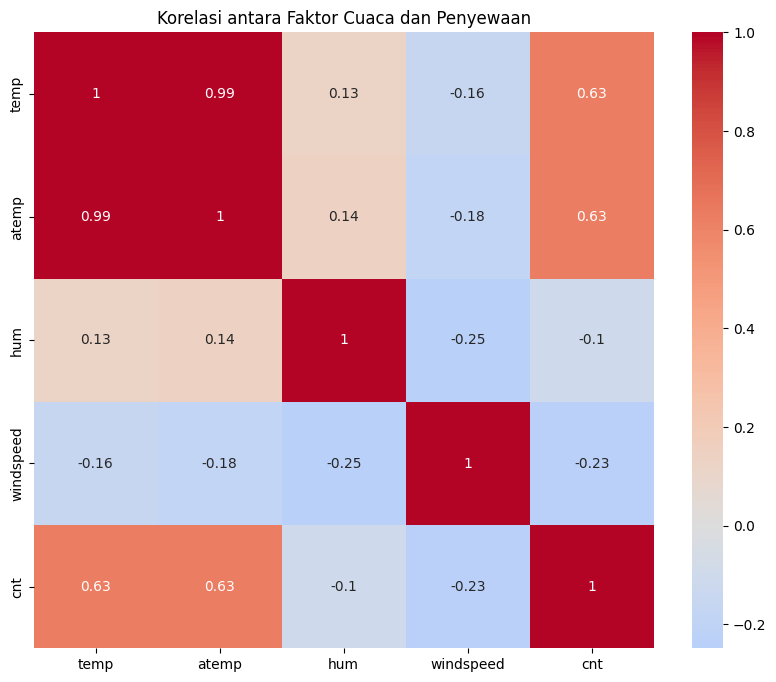

In [56]:
# Analisis korelasi faktor cuaca
comfort_factors = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_df[comfort_factors].corr()

# Visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Faktor Cuaca dan Penyewaan')
plt.show()

### Q6: Karakteristik Pengguna

<Figure size 1200x600 with 0 Axes>

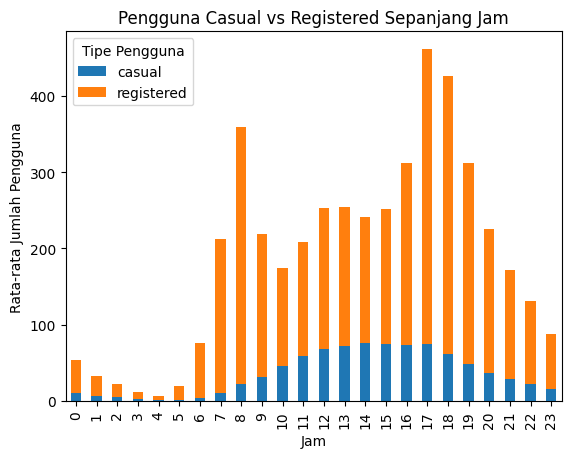

In [57]:
# Distribusi pengguna per jam
hourly_user_dist = hour_df.groupby('hr')[['casual', 'registered']].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
hourly_user_dist.plot(kind='bar', stacked=True)
plt.title('Pengguna Casual vs Registered Sepanjang Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.legend(title='Tipe Pengguna')
plt.show()

## Conclusion

1. **Optimasi Kapasitas:**
   - Jam puncak penyewaan terjadi pada jam-jam tertentu.
   - Perlu perencanaan kapasitas sesuai pola penggunaan.

2. **Mitigasi Dampak Cuaca:**
   - Cuaca memiliki pengaruh signifikan terhadap penyewaan.
   - Temperatur berkorelasi positif dengan jumlah penyewaan.

3. **Tren Musiman:**
   - Terdapat variasi penyewaan antar musim dan tahun.
   - Musim gugur memiliki penyewaan tertinggi diantara lainnya.

4. **Dampak Hari Libur:**
   - Terdapat perbedaan pola penyewaan pada hari libur.
   - Penyewaan lebih tinggi Ketika hari sedang libur

5. **Faktor Kenyamanan Cuaca:**
   - Suhu memiliki korelasi positif kuat dengan jumlah penyewaan sepeda (0.63), sedangkan kecepatan angin memiliki korelasi negatif (-0.23), menunjukkan bahwa cuaca hangat mendorong lebih banyak penyewaan, sementara angin kencang menguranginya. Kelembapan memiliki korelasi negatif lemah (-0.1), sehingga tidak terlalu mempengaruhi jumlah penyewaan sepeda.

6. **Karakteristik Pengguna:**
   - Pengguna terdaftar (registered) mendominasi penyewaan sepeda sepanjang hari, dengan lonjakan signifikan pada jam sibuk pagi (07:00-09:00) dan sore (16:00-18:00), menunjukkan bahwa mereka kemungkinan besar menggunakan sepeda untuk keperluan komuter. 
   - Sementara itu, pengguna casual cenderung lebih merata sepanjang hari dengan sedikit peningkatan pada siang dan sore hari, yang mengindikasikan penggunaan rekreasi atau santai.

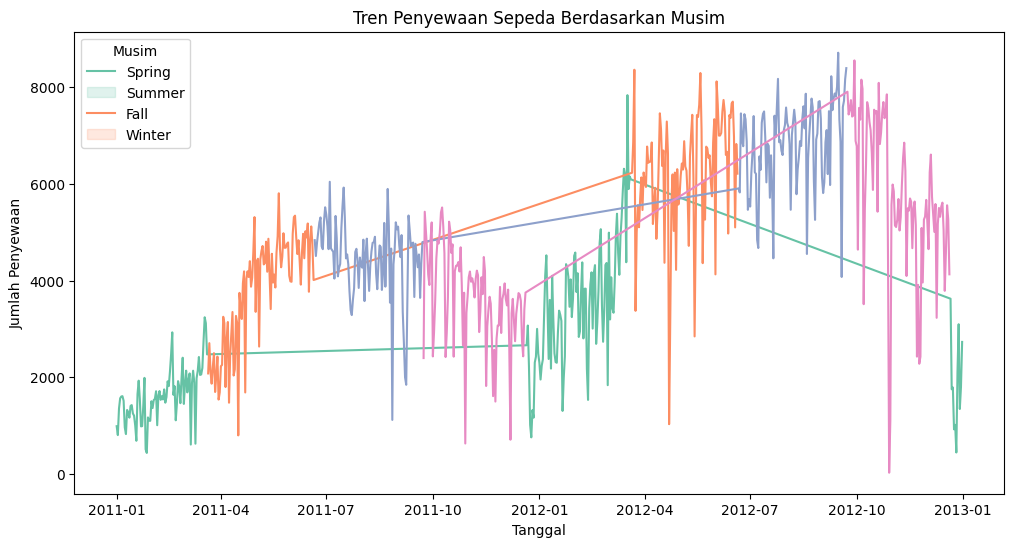

In [58]:
# Map season labels to numeric values first
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
day_df['season'] = day_df['season'].map(season_mapping)

# Visualisation code
plt.figure(figsize=(12, 6))
day_df['dteday'] = pd.to_datetime(day_df['dteday'])  # Ensure date is in datetime format
sns.lineplot(data=day_df, x='dteday', y='cnt', hue=day_df['season'].astype(str), palette='Set2')
plt.title("Tren Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Musim", labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

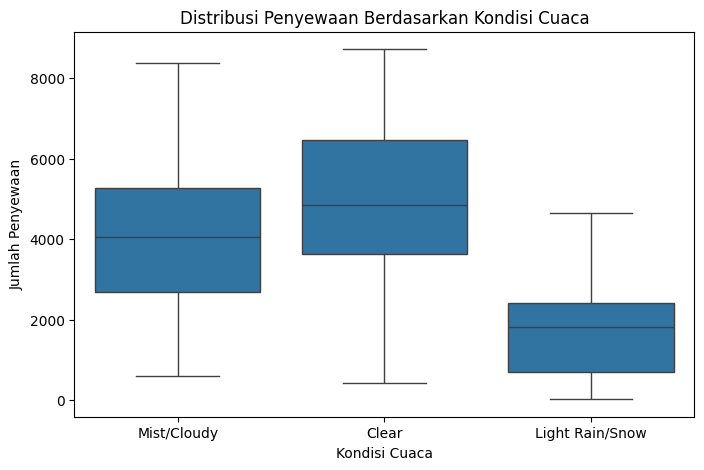

In [59]:

# Analisis Pengaruh Cuaca terhadap Penyewaan
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title("Distribusi Penyewaan Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()


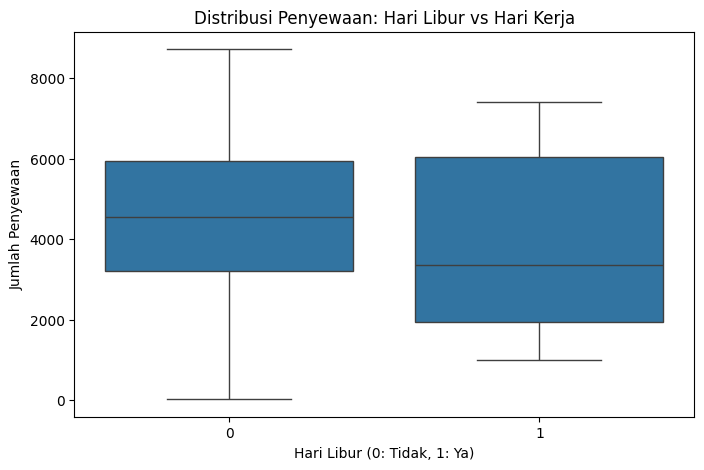

In [60]:

# Analisis Penyewaan pada Hari Libur vs Hari Kerja
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='holiday', y='cnt')
plt.title("Distribusi Penyewaan: Hari Libur vs Hari Kerja")
plt.xlabel("Hari Libur (0: Tidak, 1: Ya)")
plt.ylabel("Jumlah Penyewaan")
plt.show()


Jumlah nilai NaN setelah konversi: 731


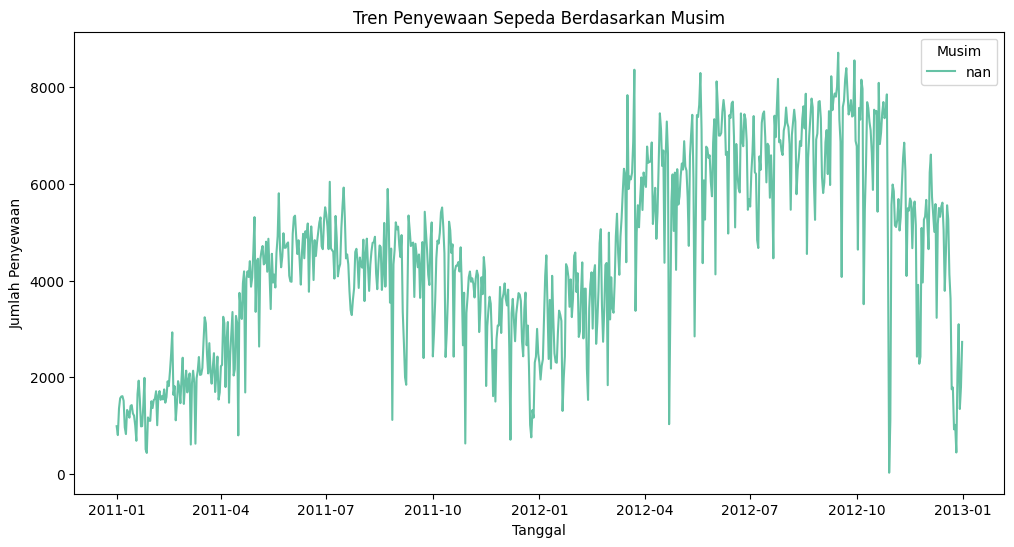

In [61]:
# Kolom season bertipe string sebelum konversi
day_df['season'] = day_df['season'].astype(str)

# Mapping season dari string ke angka
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
day_df['season'] = day_df['season'].map(season_mapping)

# Cek apakah ada nilai NaN setelah konversi
print("Jumlah nilai NaN setelah konversi:", day_df['season'].isna().sum())

# Jika masih ada NaN, isi dengan mode (nilai terbanyak) dengan aman
if day_df['season'].isna().sum() > 0:
    mode_value = day_df['season'].mode()
    if not mode_value.empty:  # Pastikan mode tidak kosong
        day_df['season'].fillna(mode_value.iloc[0], inplace=True)

# Visualisasi Tren Penyewaan Berdasarkan Musim
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue=day_df['season'].astype(str), palette='Set2')
plt.title("Tren Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Musim")
plt.show()
